In [133]:
from sklearn.model_selection import train_test_split

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from re import sub
from decimal import Decimal
from sklearn.preprocessing import MultiLabelBinarizer
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

airbnb_uc=pd.read_csv("data/listings_CPH.csv")

In [135]:
#Dropping unnecessary columns = 

#airbnb_uc.drop("name","host_id", "neighbourhood_group","license","host_name","last_review", inplace=True, axis=1)

#name not relevant
airbnb_uc.drop('name', inplace=True, axis=1)

#host_id not relevant
airbnb_uc.drop('host_id', inplace=True, axis=1)

#neighbourhood column only contains NaN values
airbnb_uc.drop('neighbourhood_group', inplace=True, axis=1)

#license column only contains NaN values
airbnb_uc.drop("license", inplace=True, axis=1)

#host_names not relevant
airbnb_uc.drop("host_name", inplace=True, axis=1)

#last_review not relevant
airbnb_uc.drop("last_review", inplace=True, axis=1)

#Replace NaN values in reviews_per_month with 0
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)
airbnb_uc.reviews_per_month.isnull().sum()

# Create dummy variables for neighboorhood column

set(airbnb_uc['neighbourhood'])
neighbourhood = pd.get_dummies(airbnb_uc['neighbourhood'].str.lower().str.replace(' ', '_'))
airbnb_uc1 = pd.merge(airbnb_uc, neighbourhood, left_index=True, right_index=True)
airbnb_uc1 = airbnb_uc1.drop('neighbourhood', 1)

airbnb_uc1.head()

# Create dummy variables for room type column

room_type = pd.get_dummies(airbnb_uc['room_type'])
airbnb = pd.merge(airbnb_uc1, room_type, left_index=True, right_index=True)
airbnb = airbnb.drop('room_type', 1)

airbnb.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,3,172,1.08,1,0,4,...,1,0,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,4,59,0.55,1,303,8,...,0,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,3,300,2.06,3,56,7,...,0,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,7,24,0.16,1,59,2,...,0,0,0,0,1,0,1,0,0,0
4,31094,55.666602,12.555283,1954,3,19,0.13,1,0,2,...,0,0,0,0,1,0,1,0,0,0


In [136]:
# normalizing price, minimum nights, number of reviews, reviews per month, 
# calculated host listings count and availibilty for values between 0 and 1.

def normalizing(column):
    new_column = (column - column.min()) / (column.max() - column.min())
    return new_column

#airbnb['price'] = normalizing(airbnb['price'])
airbnb['minimum_nights'] = normalizing(airbnb['minimum_nights'])
airbnb['number_of_reviews'] = normalizing(airbnb['number_of_reviews'])
airbnb['reviews_per_month'] = normalizing(airbnb['reviews_per_month'])
airbnb['calculated_host_listings_count'] = normalizing(airbnb['calculated_host_listings_count'])
airbnb['availability_365'] = normalizing(airbnb['availability_365'])
airbnb['number_of_reviews_ltm'] = normalizing(airbnb['number_of_reviews_ltm'])

airbnb.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,1,0,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,1,0,1,0,0,0
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,1,0,1,0,0,0


In [137]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
count,1.381500e+04,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,...,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000
mean,1.719385e+17,55.680569,12.557805,1205.878972,0.003248,0.026120,0.033147,0.019105,0.255624,0.011573,...,0.164169,0.109374,0.047991,0.025335,0.165762,0.000072,0.885197,0.001086,0.112269,0.001375
std,2.852538e+17,0.021088,0.033512,1433.143149,0.015225,0.051199,0.045081,0.119655,0.337430,0.024149,...,0.370443,0.312119,0.213756,0.157146,0.371880,0.008508,0.318795,0.032934,0.315709,0.037061
min,6.983000e+03,55.609510,12.435670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.907962e+07,55.666110,12.540285,729.000000,0.000901,0.002813,0.006245,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.931542e+07,55.681190,12.555520,995.000000,0.001802,0.009845,0.017902,0.000000,0.054795,0.006369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.665348e+17,55.695770,12.580741,1368.500000,0.002703,0.028129,0.041632,0.000000,0.476712,0.012739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.222925e+17,55.742800,12.651740,64900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
#df=pd.read_csv("listings_CPH.CSV")
df=airbnb.copy()

In [139]:
df.shape

(13815, 26)

In [140]:

#df_price=df.price.copy()
#df_price[1].sort_values(ascending=True)

#df_price['price']=df_price[1]
#df_price.head()
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,1,0,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,1,0,1,0,0,0
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,1,0,1,0,0,0


In [141]:
#Firstly, we want to make a binary classifier. We therefore need reduce the different prices to a categorical binary target variable. We 
#will use the categories ‘low’ and 'high' as the target variable. To separate the data we need to define a treshold, were observations with a 
# rental price below the threshold will be categorized as 'low', and observations with renatl price above the threshold will be categorized as
# 'high'. We will here take a look at both the median and the mean.

median=df.price.median()
mean=df.price.mean()
#df.price=df.price.astype(float)
print(median)

995.0


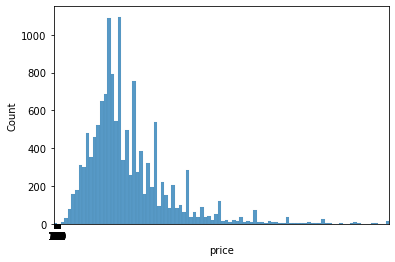

In [142]:
fig, ax = plt.subplots()
sns.histplot(df.price, ax=ax)
ax.set_xlim(1,5000)
ax.set_xticks(range(1,100))
plt.plot( linewidth=2)
plt.show()

In [143]:
print('number of houses with pricing over the mean', len(df[df.price>mean]))
print('number of houses with pricing below the mean', len(df[df.price<mean]))
print('number of houses with pricing over the median', len(df[df.price>median]))
print('number of houses with pricing below the median', len(df[df.price<median]))

number of houses with pricing over the mean 4280
number of houses with pricing below the mean 9535
number of houses with pricing over the median 6845
number of houses with pricing below the median 6899


In [144]:
#We can see that the median splits the observations more evenly than using the mean. 
#We will therefore use the median as threshold, to gain a more balanced dataset.

In [145]:
df['high']=df['price'].apply(lambda x: x>median)
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire ho me/apt,Entire home/apt,Hotel room,Private room,Shared room,high
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,0,0,0,0,0,1,0,0,0,False
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,1,0,0,0,True
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,1,0,0,0,True
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,1,0,1,0,0,0,False
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,1,0,1,0,0,0,True


In [146]:
#Multi class classification: 
#For the multi class classification, se will again need to reduce the the price down to a categorical attribute with 3 values: 'low', 'med', 'high'.
#We will split the observations using the percentiles as threschold.
mediumPerc=np.percentile(df['price'], 33)
highPerc=np.percentile(df['price'], 66)
print(highPerc)
print(mediumPerc)

1200.0
800.0


In [147]:
print('number of houses with pricing low', len(df[df.price<mediumPerc]))
print('number of houses with pricing medium', len(df[df.price > mediumPerc])-len(df[df.price>highPerc]))
print('number of houses with pricing high', len(df[df.price>highPerc]))
#'low’ means that the price of the rental is lower than the 33th percentile of prices in the city, 
# ‘medium’ means that the price is between the 33th and 66th percentile, 
# and ‘high’ that the price higher than the 66th percentile.
# As we can see this gives an quite eve split and a balanced dataset.

number of houses with pricing low 4221
number of houses with pricing medium 4799
number of houses with pricing high 4289


In [148]:
df['Price Category'] = np.where(df.price <= mediumPerc, 'low', np.where(df.price >= highPerc  , 'high', 'med'))
df.head().T

,0,1,2,3,4
id,6983,26057,26473,29118,31094
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
price,898,2600,3250,725,1954
minimum_nights,0.001802,0.002703,0.001802,0.005405,0.001802
number_of_reviews,0.241913,0.082982,0.421941,0.033755,0.026723
reviews_per_month,0.044963,0.022898,0.085762,0.006661,0.005412
calculated_host_listings_count,0.0,0.0,0.011236,0.0,0.0
availability_365,0.0,0.830137,0.153425,0.161644,0.0
number_of_reviews_ltm,0.008493,0.016985,0.014862,0.004246,0.004246


In [149]:
df2=df.copy()

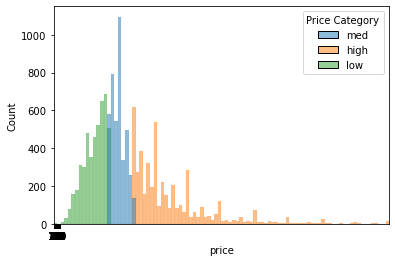

In [150]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="price", hue="Price Category")
ax.set_xlim(1,5000)
ax.set_xticks(range(1,100))
plt.show()

In [151]:

split=int(len(df2)*2.0/3)
training=df2[:split]
test=df2[split:]
x_train=training[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
x_test=test[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
y_train=training['high']
y_test=test['high']

In [90]:
x_train.head().T

,0,1,2,3,4
latitude,55.686410,55.693070,55.676020,55.670230,55.666602
longitude,12.547410,12.576490,12.575400,12.555040,12.555283
minimum_nights,0.001802,0.002703,0.001802,0.005405,0.001802
number_of_reviews,0.241913,0.082982,0.421941,0.033755,0.026723
reviews_per_month,0.044963,0.022898,0.085762,0.006661,0.005412
calculated_host_listings_count,0.000000,0.000000,0.011236,0.000000,0.000000
availability_365,0.000000,0.830137,0.153425,0.161644,0.000000
number_of_reviews_ltm,0.008493,0.016985,0.014862,0.004246,0.004246
amager_st,0.000000,0.000000,0.000000,0.000000,0.000000
amager_vest,0.000000,0.000000,0.000000,0.000000,0.000000


In [152]:
def build_log_reg_classifiers( x_train, y_train, x_test, y_test):
    LogReg=LogisticRegression(max_iter=100000)
    LogReg.fit(x_train, y_train)
    LogReg.score(x_test,y_test)
    y_pred=LogReg.predict(x_test)
    return LogReg, y_pred

In [153]:
#First we will try using logistic regression
model, y_pred= build_log_reg_classifiers(x_train, y_train, x_test, y_test)

Logistic regression gives f1 score is 0.6630705394190872
Logistic regression accuracy score is 0.6473398479913138


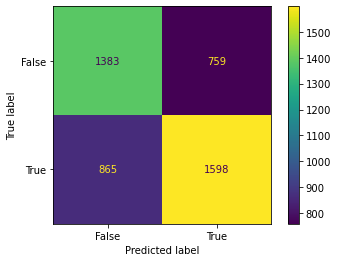

In [154]:

plot_confusion_matrix(model, x_test, y_test)  
print('Logistic regression gives f1 score is',f1_score(y_test,y_pred))
print('Logistic regression accuracy score is',model.score(x_test,y_test))

SVC f1 score is 0.2528735632183908
SVC accuracy is 0.5342019543973942


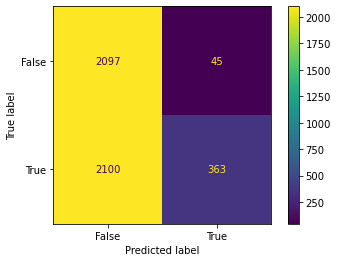

In [155]:
#We then build a support vector classifier
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)
y_pred=sv.predict(x_test)

#Evauluating the results
plot_confusion_matrix(sv, x_test, y_test)  
print('SVC f1 score is',f1_score(y_test,y_pred))
print('SVC accuracy is',sv.score(x_test,y_test))




Random Forest Classifier f1 score is 0.7120540019286404
Random Forest Classifier accuracy score is 0.6757871878393051


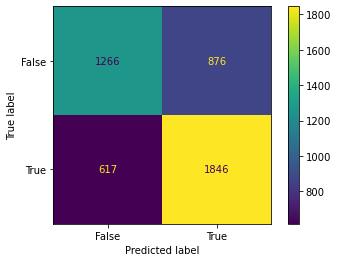

In [156]:
# Building a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
Rnd_forest=RandomForestClassifier()
Rnd_forest.fit(x_train,y_train)
Rnd_forest.score(x_test,y_test)
y_pred=Rnd_forest.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Rnd_forest, x_test, y_test)  
print('Random Forest Classifier f1 score is',f1_score(y_test,y_pred))
print('Random Forest Classifier accuracy score is',Rnd_forest.score(x_test,y_test))
#We can clearly see that the Random Forest Classifier gives the best results. The classifier satisfies the bencmark of a f1 score >0.6.

the accuracy score is 0.49098805646036914
The weigted F1 score using sklearn library : 0.46656924673238137
Macro-Averaged F1 score using sklearn library : 0.4634356627757458
Micro-Averaged F1 score using sklearn library : 0.49098805646036914


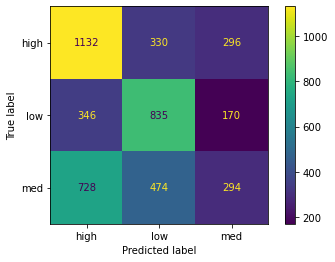

In [161]:
#Multi classification problem using logistic regression

MultiLogReg=LogisticRegression(max_iter=100000)
y_train=training['Price Category']
y_test=test['Price Category']
MultiLogReg.fit(x_train, y_train)
MultiLogReg.score(x_test,y_test)

#Evaluation
y_multi_pred=MultiLogReg.predict(x_test)
plot_confusion_matrix(MultiLogReg, x_test, y_test)  
print('the accuracy score is',MultiLogReg.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'weighted')
print(f"The weigted F1 score using sklearn library : {weighted_f1}")
macro_averaged_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")
micro_averaged_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")


The accuracy is : 0.5305103148751357
The weigted F1 score using sklearn library : 0.5215452653369865
Macro-Averaged F1 score using sklearn library : 0.5186310922749361
Micro-Averaged F1 score using sklearn library : 0.5305103148751357


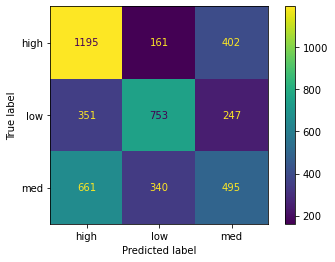

In [167]:
#Multi class problem using Random forest classifier
Multi_rnd_forest=RandomForestClassifier()
Multi_rnd_forest.fit(x_train,y_train)

Multi_rnd_forest_y_pred=Multi_rnd_forest.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Multi_rnd_forest, x_test, y_test)  
print('The accuracy is :',Multi_rnd_forest.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, Multi_rnd_forest_y_pred, average = 'weighted')
print(f"The weigted F1 score using sklearn library : {weighted_f1}")
macro_averaged_f1 = metrics.f1_score(y_test, Multi_rnd_forest_y_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")
micro_averaged_f1 = metrics.f1_score(y_test, Multi_rnd_forest_y_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

# The micro averaged F1 score computes the  global precision and recall-scores from the sum of False positives, false negatives,
# true positives and true negatives across all classes. The micro averaged F1 score, along with the accuracy, are good performance indicators
#because our dataset is very evenly balanced.
# The macro averaged F1 score is another performance indicator. It is obtained by averaging the precision and recall scores of individual classes.

#The Random forest classifier gives the highest F1 scores, both micro averaged, macro averaged and weighted. It also provides the best accuracy of
# all the other classifiers. Because of our balanced data set, the acccuracy may be the most intuitive and most precise performance indicator.
# We can compare our results with a baseline. We can calcuate this baseline by predicting that all of the observations fall 
# within the category with most observations in the trainingset. The baseline will have an accuracy of approxiamently 0.35. 
# Our Random forest classifier provides us with an 17% higher accuracy than the baseline.

SVC accuracy is 0.40955483170466883
The weigted F1 score using sklearn library : 0.3222861317051507
Macro-Averaged F1 score using sklearn library : 0.3205313816991195
Micro-Averaged F1 score using sklearn library : 0.40955483170466883


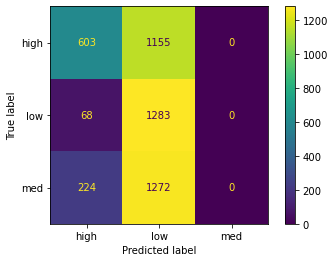

In [169]:
Multi_sv=SVC()
Multi_sv.fit(x_train,y_train)
Multi_sv.score(x_test,y_test)
Multi_sv_y_pred=Multi_sv.predict(x_test)

#Evauluating the results
plot_confusion_matrix(Multi_sv, x_test, y_test)  
print('SVC accuracy is',Multi_sv.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'weighted')
print(f"The weigted F1 score using sklearn library : {weighted_f1}")
macro_averaged_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")
micro_averaged_f1 = metrics.f1_score(y_test, Multi_sv_y_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

SVC accuracy is 0.4762214983713355
The weigted F1 score using sklearn library : 0.47284791847626395
Macro-Averaged F1 score using sklearn library : 0.47109296616934704
Micro-Averaged F1 score using sklearn library : 0.4762214983713355


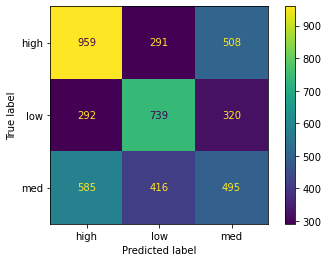

In [173]:
from sklearn.tree import DecisionTreeClassifier
my_tree=DecisionTreeClassifier()
my_tree.fit(x_train,y_train)
my_tree.score(x_test,y_test)
my_tree_y_pred=my_tree.predict(x_test)

#Evauluating the results
plot_confusion_matrix(my_tree, x_test, y_test)  
print('SVC accuracy is',my_tree.score(x_test,y_test))
weighted_f1 = metrics.f1_score(y_test, my_tree_y_pred, average = 'weighted')
print(f"The weigted F1 score using sklearn library : {weighted_f1}")
macro_averaged_f1 = metrics.f1_score(y_test, my_tree_y_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")
micro_averaged_f1 = metrics.f1_score(y_test, my_tree_y_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

In [171]:
# from sklearn.cluster import KMeans
# K=3
# k=KMeans(K)
# k.fit(x_train,y_train)
# k.score(x_test,y_test)
# k_y_pred=k.predict(x_test)

# #Evauluating the results
# #plot_confusion_matrix(k, x_test, y_test)  
# print('SVC accuracy is',k.score(x_test,y_test))
# weighted_f1 = metrics.f1_score(y_test, k_y_pred, average = 'weighted')
# print(f"The weigted F1 score using sklearn library : {weighted_f1}")
# macro_averaged_f1 = metrics.f1_score(y_test, k_y_pred, average = 'macro')
# print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")
# micro_averaged_f1 = metrics.f1_score(y_test, k_y_pred, average = 'micro')
# print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

SVC accuracy is -4344.885557196889


ValueError: Mix of label input types (string and number)

In [ ]:
from sklearn.cluster import DBSCAN
import random

In [159]:
MultiLogReg.coef_
#forklare coeffesienten

array([[-0.2604424 ,  1.07333653, -1.30908496, -1.25833625, -1.0944889 ,
         1.03595237,  1.23445461, -0.36004536, -0.1683018 ,  0.24901101,
        -0.75515945,  0.15438561,  0.15057821,  0.78785036, -0.26291469,
        -0.00392528, -0.11975385, -0.11504083,  0.09118518,  0.84494811,
         0.37079987, -0.35469832, -0.83196628],
       [ 0.29000946, -1.16830699,  1.06851076,  1.55508639,  0.73324439,
        -1.27501805, -1.20679987,  0.24726351,  0.20898953, -0.24022113,
         0.8188195 , -0.06392947, -0.21838877, -0.8988115 ,  0.14189492,
        -0.02486677,  0.18694694,  0.33784633, -0.25078335, -1.3235251 ,
         0.12069349,  0.74692526,  0.84483135],
       [-0.02956706,  0.09497046,  0.2405742 , -0.29675014,  0.36124451,
         0.23906569, -0.02765474,  0.11278186, -0.04068773, -0.00878988,
        -0.06366005, -0.09045614,  0.06781056,  0.11096113,  0.12101977,
         0.02879205, -0.06719309, -0.22280551,  0.15959816,  0.47857699,
        -0.49149337, -0.3922